## Instalar todas las bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Importar Base de Datos

In [3]:
data = pd.read_excel('BBDD_EPA_NIVELES_ABSTRACCION_CLASS-Mineria_de_datos.xlsx', sheet_name='Base datos ')

### Transformar variables categoricas a binarias

In [45]:
## Ver tipos de variables
print(data.dtypes)

Nº                      int64
Modalidad              object
Edad                    int64
Semestre                int64
Pregunta1               int64
Pregunta2               int64
Rotular                 int64
ReduccionContenido      int64
Titulo                  int64
PromedioPreguntas     float64
Abstraccion final      object
dtype: object


In [4]:
# Convertir la columna 'Modalidad' a binaria
data['Modalidad'] = data['Modalidad'].apply(lambda x: 1 if x == 'Vespertina' else 0)

In [5]:
data['Abstraccion final'] = data['Abstraccion final'].astype('category')
print(data['Abstraccion final'].cat.categories)

Index(['ABSTRACCION BUENA', 'ABSTRACCION SATISFACTORIA', 'NO ABSTRACCION'], dtype='object')


In [48]:
print(data)

      Nº  Modalidad  Edad  Semestre  Pregunta1  Pregunta2  Rotular  \
0      1          0    25         5          2          1        4   
1      2          0    26         5          1          1        1   
2      3          0    21         5          2          1        1   
3      4          0    21         5          1          1        1   
4      5          0    24         5          3          1        1   
..   ...        ...   ...       ...        ...        ...      ...   
109  113          1    24         7          2          1        2   
110  114          1    27         7          2          1        1   
111  115          1    24         7          1          2        2   
112  117          1    26         7          1          1        2   
113  118          1    23         7          1          1        1   

     ReduccionContenido  Titulo  PromedioPreguntas          Abstraccion final  
0                     1       1                1.8             NO ABSTRACCION  

In [6]:
##Separar los dos tipos de set de variables##
abs = data.iloc[:, 1:9] 
print(abs)


     Modalidad  Edad  Semestre  Pregunta1  Pregunta2  Rotular  \
0            0    25         5          2          1        4   
1            0    26         5          1          1        1   
2            0    21         5          2          1        1   
3            0    21         5          1          1        1   
4            0    24         5          3          1        1   
..         ...   ...       ...        ...        ...      ...   
109          1    24         7          2          1        2   
110          1    27         7          2          1        1   
111          1    24         7          1          2        2   
112          1    26         7          1          1        2   
113          1    23         7          1          1        1   

     ReduccionContenido  Titulo  
0                     1       1  
1                     1       1  
2                     1       1  
3                     1       1  
4                     1       1  
..             

# Análisis de Componentes Principales 
## Para poder hacer un análisis de componentes principales, se deben realizar los siguientes pasos:
1. Preparar en entorno de trabajo: cargar base de datos
2. Realizar Ajustes del modelo
3. Realizar las Descripciones del Modelo
4. Interpretar los resultaod tecnicamente. 

## AJUSTE DEL MODELO
Para ajustar el modelo lo primero que tenemos que hacer es una correlación. Esto es de utilidad para saber el comportamientos
de las variables de la base de datos. Lo ideal es que todas las variables estén correlacionadas. Esto significa que los valores de 
correlación sean uno o estén cercanos a uno. Si son cercanacas a cero, implica que las variables no se influyen unas con otras. 


In [50]:
print(abs)


     Modalidad  Edad  Semestre  Pregunta1  Pregunta2  Rotular  \
0            0    25         5          2          1        4   
1            0    26         5          1          1        1   
2            0    21         5          2          1        1   
3            0    21         5          1          1        1   
4            0    24         5          3          1        1   
..         ...   ...       ...        ...        ...      ...   
109          1    24         7          2          1        2   
110          1    27         7          2          1        1   
111          1    24         7          1          2        2   
112          1    26         7          1          1        2   
113          1    23         7          1          1        1   

     ReduccionContenido  Titulo  
0                     1       1  
1                     1       1  
2                     1       1  
3                     1       1  
4                     1       1  
..             

In [51]:
## Correlaciones
print(abs.corr().round(2))

                    Modalidad  Edad  Semestre  Pregunta1  Pregunta2  Rotular  \
Modalidad                1.00  0.47      0.03      -0.10       0.11     0.09   
Edad                     0.47  1.00      0.14      -0.19       0.11     0.01   
Semestre                 0.03  0.14      1.00      -0.05      -0.15     0.02   
Pregunta1               -0.10 -0.19     -0.05       1.00       0.16    -0.01   
Pregunta2                0.11  0.11     -0.15       0.16       1.00     0.07   
Rotular                  0.09  0.01      0.02      -0.01       0.07     1.00   
ReduccionContenido      -0.04 -0.03      0.01       0.07       0.05     0.13   
Titulo                   0.05  0.02     -0.08       0.05      -0.01    -0.15   

                    ReduccionContenido  Titulo  
Modalidad                        -0.04    0.05  
Edad                             -0.03    0.02  
Semestre                          0.01   -0.08  
Pregunta1                         0.07    0.05  
Pregunta2                         

## Normalización
La Normalización de las variables significa quitar las escalas y dejar que todas sean iguales. La función deja las escalas de 0 a 1 para 
todas las variables. 
Para realizar el análisis de componentes principales siempre es requisito normalizar, y ademas, solo se pueden considerar variables numericas


In [7]:
def norm01(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
abs_norm = abs.apply(norm01, axis=0)
print(abs_norm)

     Modalidad      Edad  Semestre  Pregunta1  Pregunta2   Rotular  \
0          0.0  0.172414       0.4   0.333333   0.000000  1.000000   
1          0.0  0.206897       0.4   0.000000   0.000000  0.000000   
2          0.0  0.034483       0.4   0.333333   0.000000  0.000000   
3          0.0  0.034483       0.4   0.000000   0.000000  0.000000   
4          0.0  0.137931       0.4   0.666667   0.000000  0.000000   
..         ...       ...       ...        ...        ...       ...   
109        1.0  0.137931       0.8   0.333333   0.000000  0.333333   
110        1.0  0.241379       0.8   0.333333   0.000000  0.000000   
111        1.0  0.137931       0.8   0.000000   0.333333  0.333333   
112        1.0  0.206897       0.8   0.000000   0.000000  0.333333   
113        1.0  0.103448       0.8   0.000000   0.000000  0.000000   

     ReduccionContenido  Titulo  
0                   0.0     0.0  
1                   0.0     0.0  
2                   0.0     0.0  
3                   0.0

## Análisis de Componentes Principales
Del análisis de componentes principales se obtiene un proceso llamado rotación, donde se encuentra en el punto medio y se rotan los 
datos hacia el origen. Lo importante de este procedimientos es que no se altera su comportamiento, tecnicamente 
cambiamos el eje de coordenadas.
Por otro lado, se obtienen las cargas factoriales, que son los valores de coordenadas para 
encontrar un punto particular de la base de datos. 


In [8]:
#scaler = StandardScaler()
#abs_norm_scaled = scaler.fit_transform(abs)

# Realizar PCA
pca = PCA()
pca_result = pca.fit_transform(abs_norm)


explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.27760804 0.20921247 0.15632307 0.10671251 0.08769852 0.06999995
 0.06031752 0.03212791]


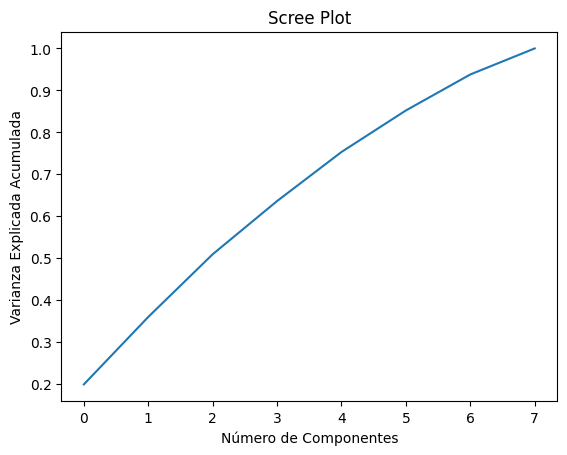

In [54]:
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Scree Plot')
plt.show()

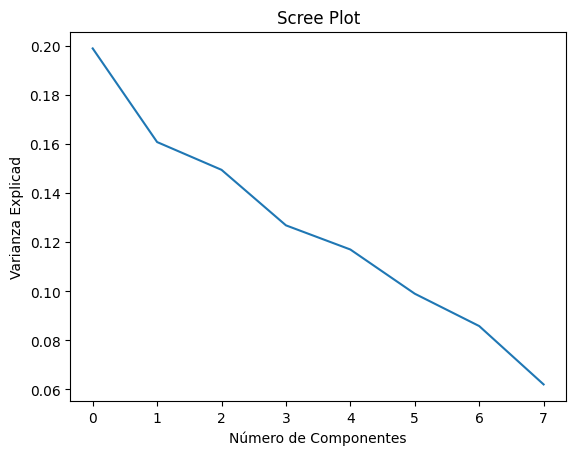

In [55]:
plt.figure()
plt.plot((explained_variance))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicad')
plt.title('Scree Plot')
plt.show()

## Valores de los componentes
El análisis de componentes principales nos entrega la estimación de cada uno de los datos para los compenentes principales, 
en todo los registros de la base de datos.
Los componentes que arroja el calculo debe ser igual al número de registros de la base de datos. Y los valores se calculan
midiendo la distancia del origen a cada uno de los puntos (ver figura), y esa distancia es el valor de los componente. 
El modelo lo que busca es captar la mayor variabilidad de los datos y hacer una reducción de los mismos. Y para ello


In [11]:
# Crear un DataFrame con las puntuaciones de los componentes principales
cp = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
cp = cp.iloc[:, :3]  # Seleccionar las primeras 3 componentes principales
print(cp)

          PC1       PC2       PC3
0   -0.472768 -0.381557 -0.113083
1   -0.483113 -0.270449 -0.452584
2   -0.563041 -0.212404 -0.207462
3   -0.522209 -0.264854 -0.444268
4   -0.580416 -0.163312  0.024355
..        ...       ...       ...
109  0.550722  0.584111 -0.328639
110  0.554514  0.635646 -0.367306
111  0.518538 -0.430341 -0.223702
112  0.492751 -0.436539 -0.447671
113  0.449628 -0.378290 -0.476358

[114 rows x 3 columns]


In [12]:
# Concatenar los DataFrames para calcular la correlación
combined_df = pd.concat([abs_norm.reset_index(drop=True), cp.reset_index(drop=True)], axis=1)



# Calcular la correlación
correlation_matrix = combined_df.corr(method='pearson')
print(correlation_matrix)




                    Modalidad      Edad  Semestre  Pregunta1  Pregunta2  \
Modalidad            1.000000  0.467937  0.031301  -0.097848   0.113185   
Edad                 0.467937  1.000000  0.135944  -0.188174   0.105548   
Semestre             0.031301  0.135944  1.000000  -0.051134  -0.151435   
Pregunta1           -0.097848 -0.188174 -0.051134   1.000000   0.164881   
Pregunta2            0.113185  0.105548 -0.151435   0.164881   1.000000   
Rotular              0.087962  0.005269  0.018510  -0.013147   0.065025   
ReduccionContenido  -0.038866 -0.031859  0.013230   0.065849   0.052943   
Titulo               0.048535  0.018896 -0.081777   0.053201  -0.005256   
PC1                  0.984767  0.550113  0.034493  -0.175188   0.183280   
PC2                 -0.069868 -0.068350 -0.142218   0.195354   0.015208   
PC3                  0.022960 -0.087812 -0.212945   0.762415   0.732545   

                     Rotular  ReduccionContenido    Titulo           PC1  \
Modalidad           0.0

In [13]:
correlation = np.corrcoef(abs_norm.T, cp.T)[:abs_norm.shape[1], abs_norm.shape[1]:]
print(correlation)

[[ 0.98476723 -0.0698681   0.02295951]
 [ 0.55011308 -0.0683498  -0.08781227]
 [ 0.03449313 -0.14221798 -0.2129454 ]
 [-0.17518845  0.19535398  0.76241508]
 [ 0.18327966  0.01520824  0.73254454]
 [ 0.10509235 -0.25465465  0.13505004]
 [-0.04165477  0.04888301  0.13600044]
 [ 0.13337399  0.97729639 -0.10590881]]
